Importing necessary libraries for data preprosessing, visualising

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline


In [5]:
# importing dataset and printing first 5 rows
df = pd.read_csv(r'C:\Users\ASUS\Documents\Python\FYP\data.csv' , encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
# naming the column for later process and printing column names
df.columns=[ "target","ids","date", "flag","user","text"]
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [7]:
# this funvti removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [8]:
# passing the text column into the function and saving into new column 'clean_tweet'
# printing the first 5 rows
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df['clean_tweet'].head()

0    is upset that he can't update his Facebook by ...
1     I dived many times for the ball. Managed to s...
2      my whole body feels itchy and like its on fire 
3     no, it's not behaving at all. i'm mad. why am...
4                                  not the whole crew 
Name: clean_tweet, dtype: object

In [9]:
# Removing Punctuations, Numbers, and Special Characters
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df['clean_tweet'].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10304\785911917.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


0    is upset that he can t update his Facebook by ...
1     I dived many times for the ball  Managed to s...
2      my whole body feels itchy and like its on fire 
3     no  it s not behaving at all  i m mad  why am...
4                                  not the whole crew 
Name: clean_tweet, dtype: object

In [10]:
# remove short words
# For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df['clean_tweet'].head()

0    upset that update Facebook texting might resul...
1       dived many times ball Managed save rest bounds
2                     whole body feels itchy like fire
3                     behaving here because over there
4                                           whole crew
Name: clean_tweet, dtype: object

In [11]:
# Now we will tokenize all the cleaned tweets in our dataset. 
# Tokens are individual terms or words, and tokenization 
# is the process of splitting a string of text into tokens.


tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [upset, that, update, Facebook, texting, might...
1    [dived, many, times, ball, Managed, save, rest...
2              [whole, body, feels, itchy, like, fire]
3               [behaving, here, because, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [12]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [upset, that, updat, facebook, text, might, re...
1    [dive, mani, time, ball, manag, save, rest, bo...
2               [whole, bodi, feel, itchi, like, fire]
3                   [behav, here, becaus, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [13]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df['clean_tweet'].head()

0    upset that updat facebook text might result sc...
1            dive mani time ball manag save rest bound
2                      whole bodi feel itchi like fire
3                         behav here becaus over there
4                                           whole crew
Name: clean_tweet, dtype: object

SVM starts from here

In [29]:
# we are taking 170000 data from our 1.6Million data.
# This is to run the model in a ample amount of time.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score,accuracy_score

# feature extraction

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=1, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'].iloc[700000:870000])

In [37]:
# extracting test and train data.
# taking 30% data for test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['target'].iloc[700000:870000], test_size = 0.30, random_state=200)


In [43]:
# taking SVM Linear as model 
from sklearn import svm
from sklearn import metrics
cls = svm.SVC (kernel='linear')
# fitting the data into the model
cls = cls.fit(x_train,y_train)


In [209]:
#prediction extraction from the testing data
pred = cls.predict(x_test)

In [210]:
# printing the accuracy of the model
accuracy_l=metrics.accuracy_score(y_test, y_pred=pred)
print ('accuracy : ',metrics.accuracy_score(y_test, y_pred=pred))


accuracy :  0.7401568627450981


In [223]:
pred = linearSVC.predict(x_test)
accuracy_l=metrics.accuracy_score(y_test, y_pred=pred)
print ('accuracy : ',metrics.accuracy_score(y_test, y_pred=pred))

accuracy :  0.7396666666666667


<AxesSubplot: title={'center': 'Confustion Matrix SVM (Linear)'}>

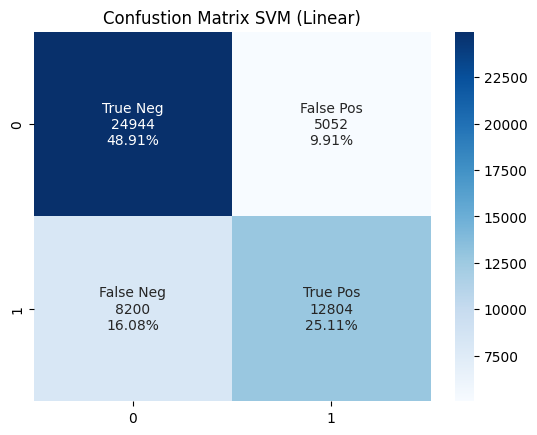

In [48]:
# showing the confustion matrix
cm = metrics.confusion_matrix(y_test, pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confustion Matrix SVM (Linear)')
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [49]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     29996
           4       0.72      0.61      0.66     21004

    accuracy                           0.74     51000
   macro avg       0.73      0.72      0.72     51000
weighted avg       0.74      0.74      0.74     51000



<AxesSubplot: title={'center': 'Classification Report SVM (Linear)'}>

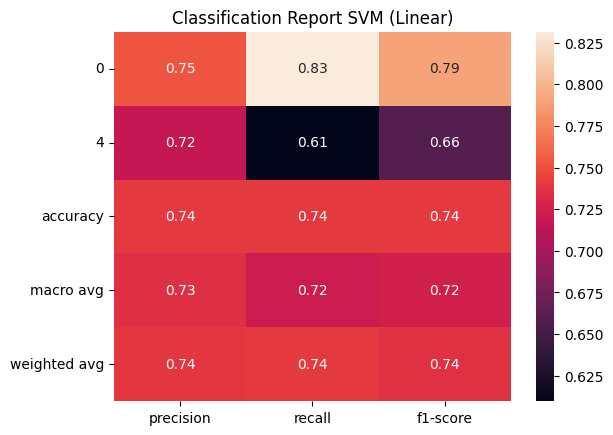

In [50]:
# showing heatmap of Classification Result
clf_report = classification_report(y_test, y_pred=pred, output_dict=True)
plt.title('Classification Report SVM (Linear)')

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


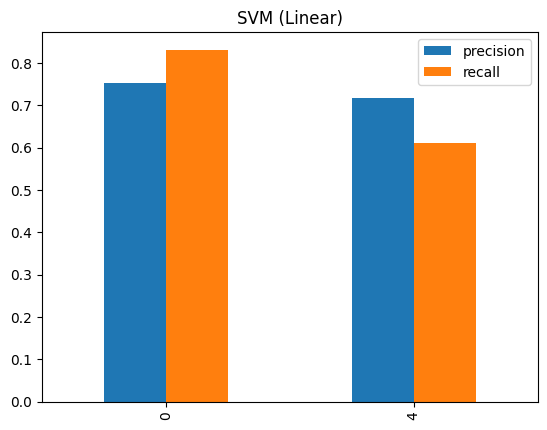

In [51]:

df_clf = pd.DataFrame(clf_report)

df_clf.iloc[:2, :2].T.plot(kind='bar')
plt.title('SVM (Linear)')
plt.show()

SVM  Polynomial Kernel

In [52]:
cls_p = svm.SVC (kernel='poly')
cls_p.fit(x_train,y_train)

SVC(kernel='poly')

In [53]:
pred_p = cls_p.predict(x_test)

In [54]:
# printing the accuracy of the model
accuracy_p = metrics.accuracy_score(y_test, y_pred=pred_p)
print ('accuracy : ',metrics.accuracy_score(y_test, y_pred=pred_p))


accuracy :  0.7094901960784313


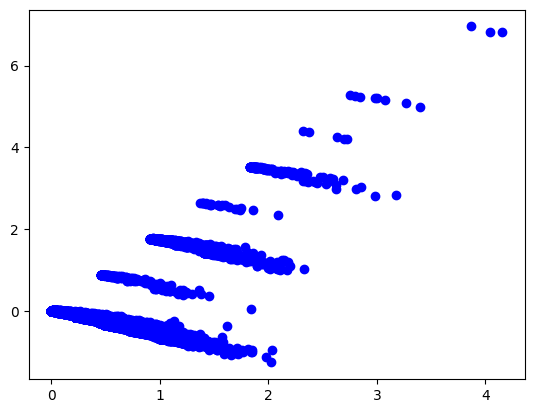

In [55]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
poly = svd.fit_transform(x_train) 
poly= pd.DataFrame(poly,columns=['x','y'])

plt.scatter(poly['x'], poly['y'], c ="blue")
 
# To show the plot
plt.show()


<AxesSubplot: title={'center': 'Confustion Matrix  SVM (Polynomial)'}>

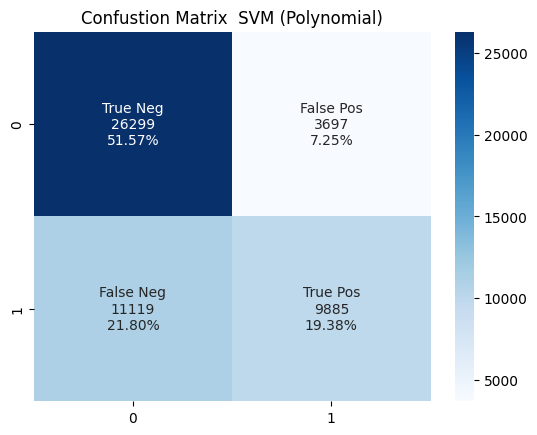

In [56]:

# showing the confustion matrix
cm_p = metrics.confusion_matrix(y_test, pred_p)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_p.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_p.flatten()/np.sum(cm_p)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confustion Matrix  SVM (Polynomial)')

sns.heatmap(cm_p, annot=labels, fmt='', cmap='Blues')

<AxesSubplot: title={'center': 'classification Report  SVM (Polynomial)'}>

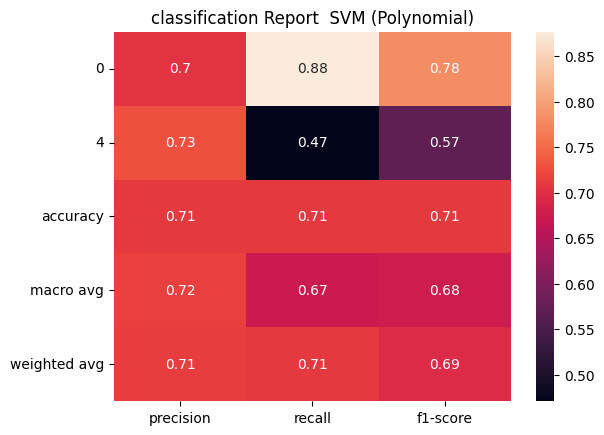

In [57]:
clf_report_p = classification_report(y_test, y_pred=pred_p, output_dict=True)
plt.title('classification Report  SVM (Polynomial)')

sns.heatmap(pd.DataFrame(clf_report_p).iloc[:-1, :].T, annot=True)

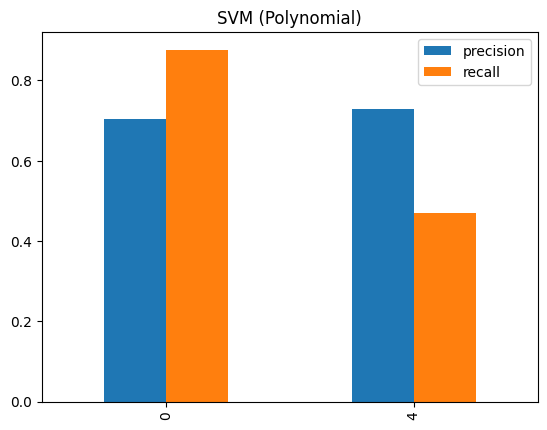

In [58]:


df_clf_p = pd.DataFrame(clf_report_p)
df_clf_p.iloc[:2, :2].T.plot(kind='bar')
plt.title('SVM (Polynomial)')
plt.show()

SVM Gaussian kernel

In [59]:
# To use Gaussian kernel, you have to specify 'rbf' as value for the Kernel parameter of the SVC class.
cls_g = svm.SVC (kernel='rbf')
cls_g.fit(x_train,y_train)

SVC()

In [60]:
pred_g = cls_g.predict(x_test)

In [61]:
# printing the accuracy of the model
accuracy_g = metrics.accuracy_score(y_test, y_pred=pred_g)
print ('accuracy : ',metrics.accuracy_score(y_test, y_pred=pred_g))

accuracy :  0.7452549019607844


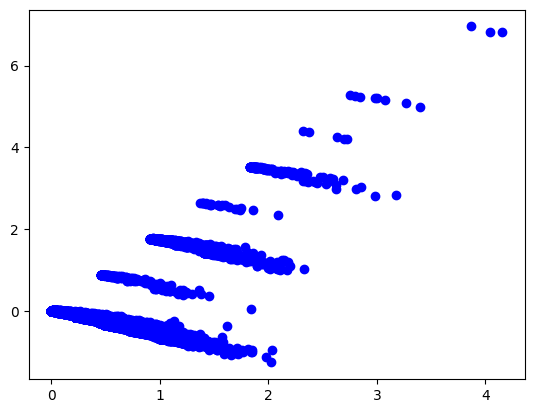

In [62]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
gau = svd.fit_transform(x_train) 
gau= pd.DataFrame(gau,columns=['x','y'])

plt.scatter(gau['x'], gau['y'], c ="blue")
 
# To show the plot
plt.show()

<AxesSubplot: title={'center': 'Confustion Matrix  SVM (Gaussian)'}>

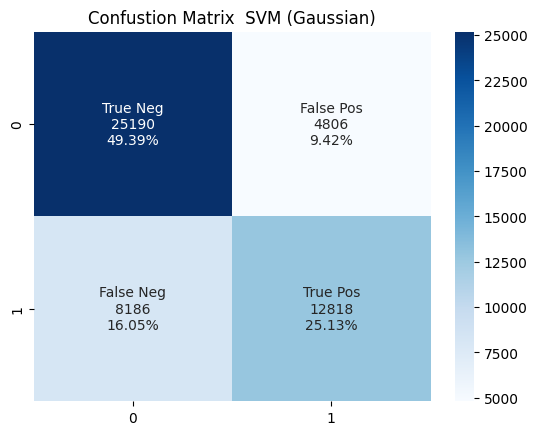

In [63]:
# showing the confustion matrix
cm_g = metrics.confusion_matrix(y_test, pred_g)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_g.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_g.flatten()/np.sum(cm_g)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confustion Matrix  SVM (Gaussian)')

sns.heatmap(cm_g, annot=labels, fmt='', cmap='Blues')

<AxesSubplot: title={'center': 'Classification Report  SVM (Gaussian)'}>

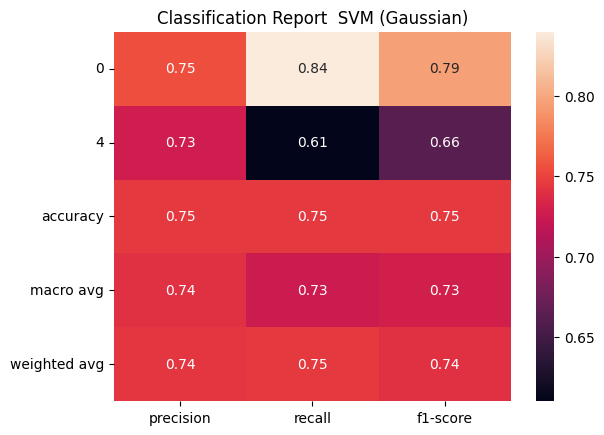

In [64]:
clf_report_g = classification_report(y_test, y_pred=pred_g, output_dict=True)
plt.title('Classification Report  SVM (Gaussian)')

sns.heatmap(pd.DataFrame(clf_report_g).iloc[:-1, :].T, annot=True)

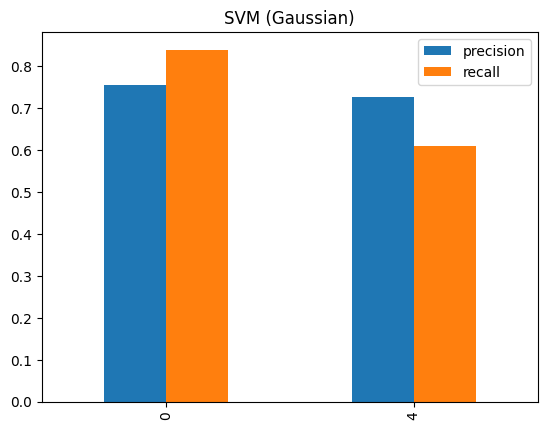

In [65]:
df_clf_g = pd.DataFrame(clf_report_g)
df_clf_g.iloc[:2, :2].T.plot(kind='bar')
plt.title('SVM (Gaussian)')
plt.show()

In [66]:
Algo_best_svm = ['SVM (Linear)','SVM (Polynomial)','SVM (Gaussian)']
score_best_svm = [accuracy_l,accuracy_p,accuracy_g]
compare_best_svm = pd.DataFrame({'Model':Algo_best_svm ,'Accuracy':score_best_svm},index=[i for i in range(1,4)])
compare_best_svm.T



,1,2,3
Model,SVM (Linear),SVM (Polynomial),SVM (Gaussian)
Accuracy,0.740157,0.70949,0.745255


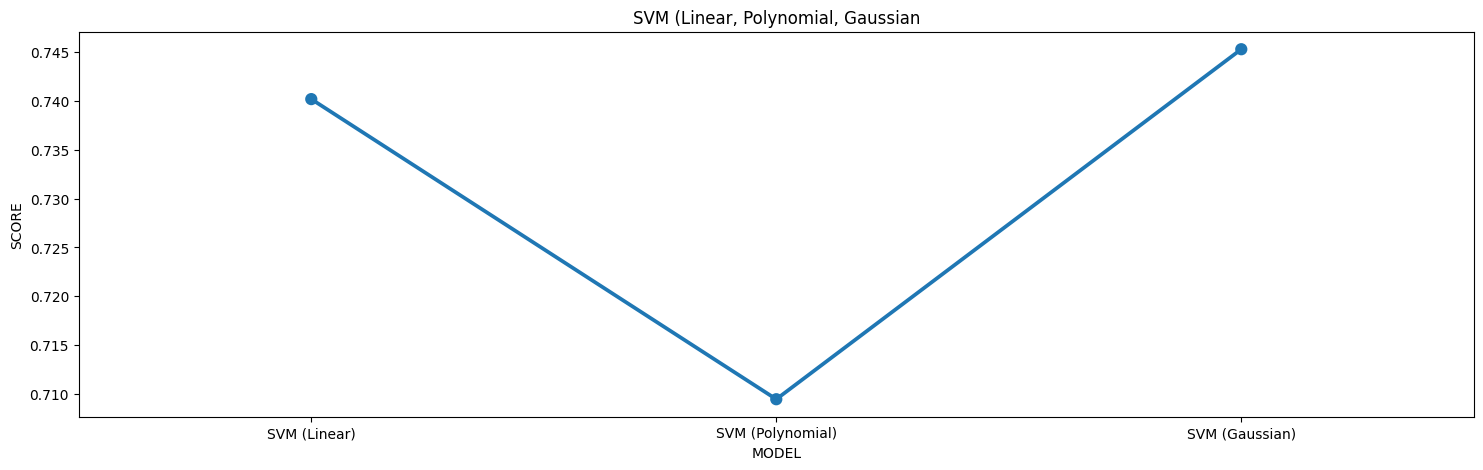

In [67]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='Accuracy',data=compare_best_svm)

plt.title('SVM (Linear, Polynomial, Gaussian')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()